# Linear Regression by Example

In [6]:
%pylab inline
pylab.style.use('ggplot')
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Check for Collinearity

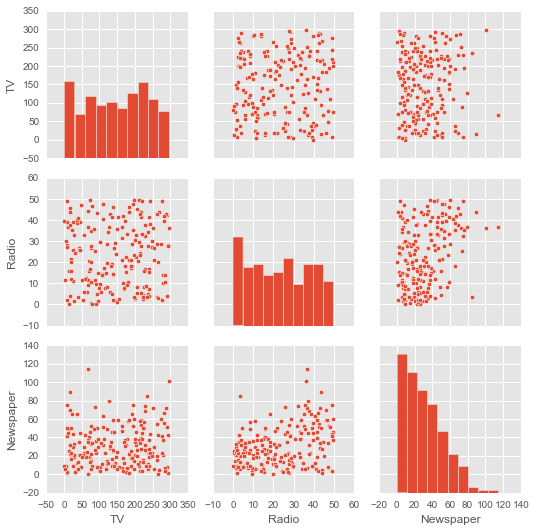

In [8]:
import seaborn as sns
sns.pairplot(data.drop('Sales', axis=1))

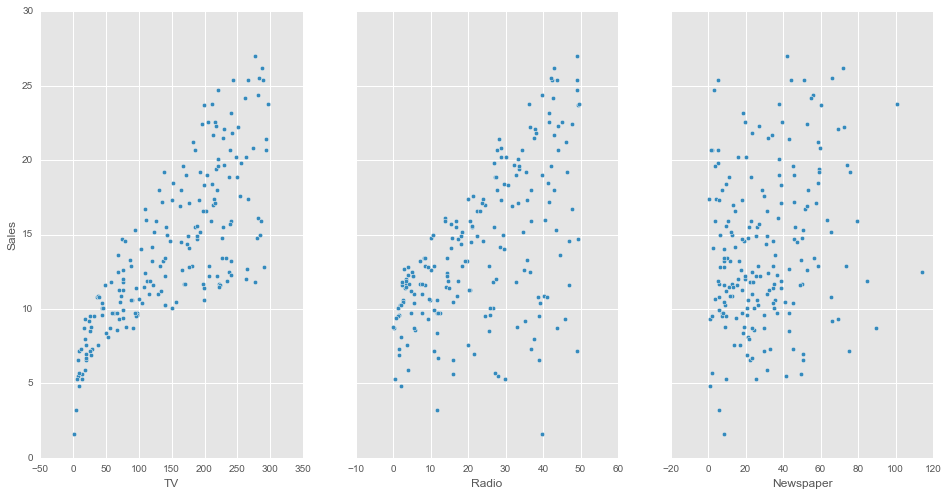

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

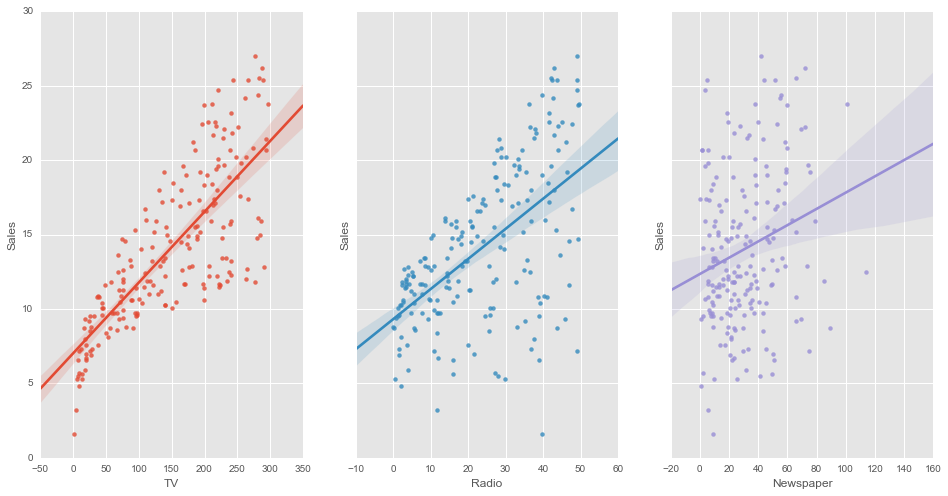

In [13]:
fig, axs = pylab.subplots(1, 3, sharey=True, figsize=(16, 8))
sns.regplot(data=data, x='TV', y='Sales', ax=axs[0])
sns.regplot(data=data, x='Radio', y='Sales', ax=axs[1])
sns.regplot(data=data, x='Newspaper', y='Sales', ax=axs[2])


In [19]:
# this is using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [18]:
print('Spending $100 on TV sales results in %s unit sales.' % (round(lm1.params['TV']*100)))

Spending $100 on TV sales results in 5.0 unit sales.


In [20]:
lm1.rsquared

0.61187505085007121

In [21]:
lm2 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm2.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [22]:
lm2.rsquared

0.89719426108289568

In [23]:
lm3 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm3.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [24]:
lm3.rsquared

0.89721063817895208